In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

## How does the data looks like?

In [3]:
df = pd.read_csv('Mall_Customers.csv', )
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Sctructure of the data

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum() # empty spots in data

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

### Distribution of variables

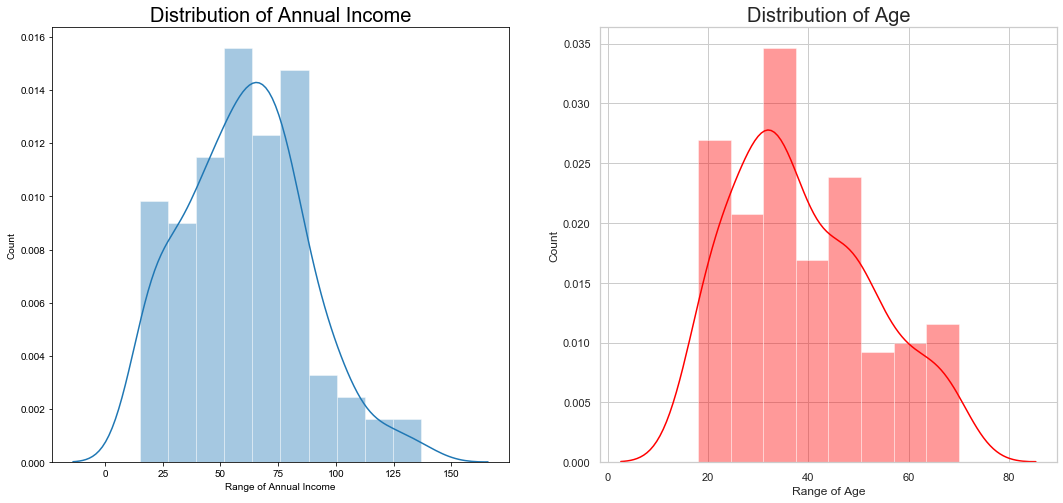

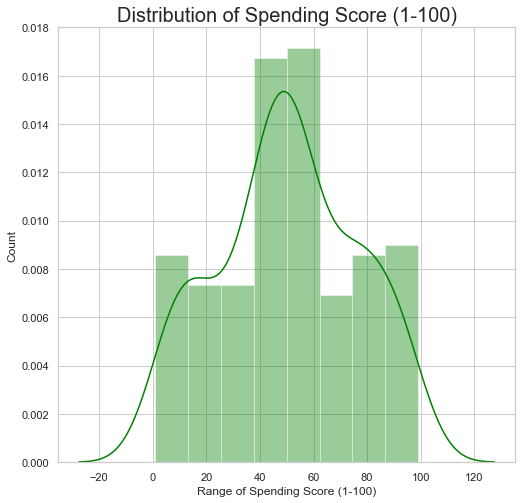

In [6]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2,2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

plt.subplot(1,2,2)
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'], color = 'green')
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')
plt.show()


#### Conclusions:
Fig. 1 (Distribution of Annual Income). Most of the people earns under 100k USD per year, the biggest group of people earns from 50-60k USD per year.  We can also see that the smallest income is around 18-20k USD. 

Fig. 2 (Distribution of Age). The youngest register person is about 18 years old, the oldest is 70 years old. The most people have from 29 to 34 years old. 

Fig. 3 (Distribution of Spending Score (1-100)). The biggest group of people have 40-50 and 50-60 of Spending Score. Other values are distrubuted evenly.

### Annual Income and Spending Score dependence

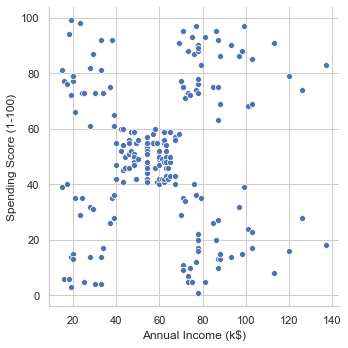

In [7]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df);

 If we would like to cluster data based on only two variables 'Annual Income (k USD)' and Spending Score (1-100)', the best idea would be to make 5 clusters. Let's see if we are right here.

## Kmeans for Annual Income and Spending Score

In [8]:
X = df[['Annual Income (k$)','Spending Score (1-100)' ]]
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss #sum of squares of the distances of each data point in all clusters to their respective centroids.

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.394312070042,
 25018.576334776335,
 21850.165282585633,
 19664.685196005543]

Text(0, 0.5, 'WCSS')

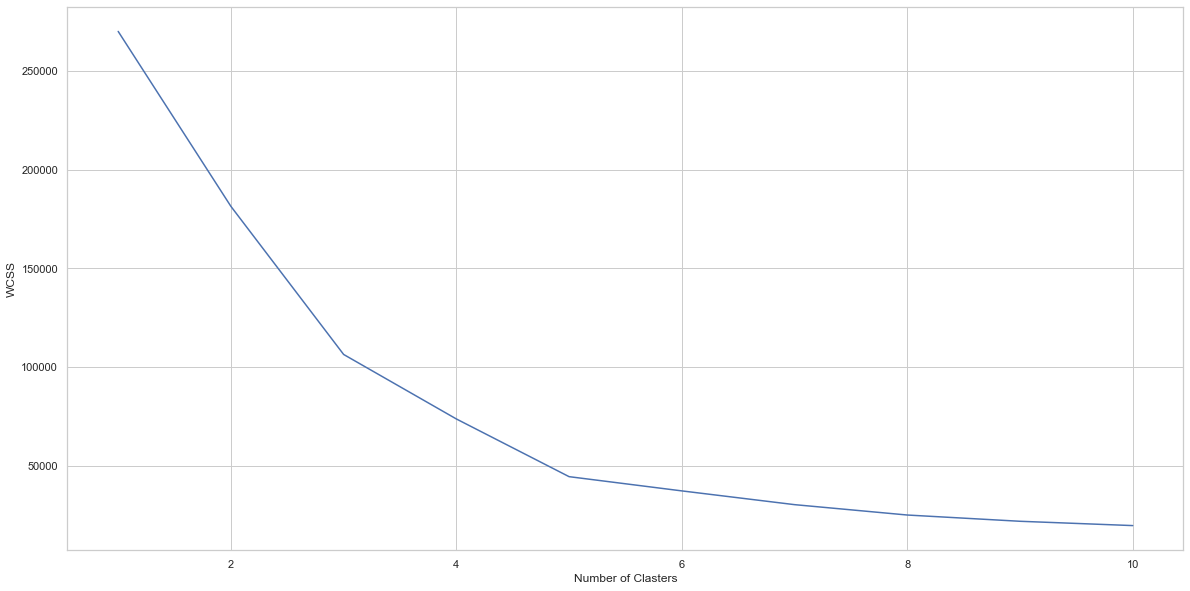

In [9]:
plt.figure(figsize=(20,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clasters')
plt.ylabel('WCSS')

We can see that we were right, model with the 5 clusters has a significant decrease of WCSS in compare with models with 1-4 clusters. Let's built a model with 5 clusters then.

In [10]:
fivemeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0) #‘k-means++’ : selects initial cluster centers for k-mean clustering
#in a smart way to speed up convergence
y_5means= fivemeansmodel.fit_predict(X)
X['Label1'] = y_5means

In [11]:
X.head()

,Annual Income (k$),Spending Score (1-100),Label1
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3


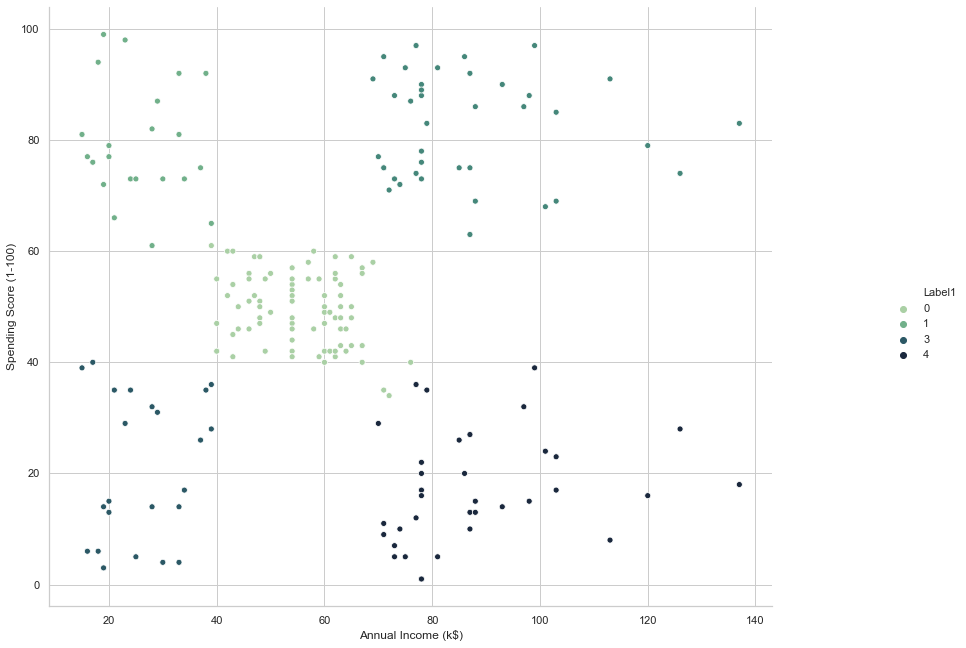

In [12]:
g = sns.relplot(x="Annual Income (k$)", y='Spending Score (1-100)', palette="ch:r=-.5,l=.75", hue="Label1", data=X);
g.fig.set_size_inches(15,10)

## Hierarchial Clustering for Annual Income and Spending Score

In [13]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
X["Label2"] = y_hc
X.head()

,Annual Income (k$),Spending Score (1-100),Label1,Label2
0,15,39,3,4
1,15,81,1,3
2,16,6,3,4
3,16,77,1,3
4,17,40,3,4


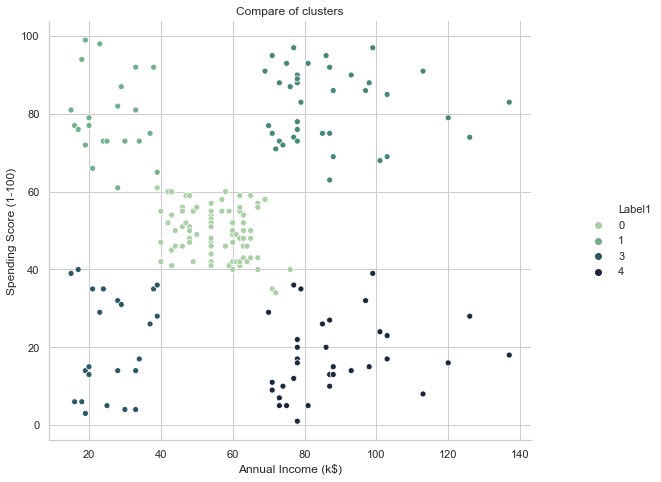

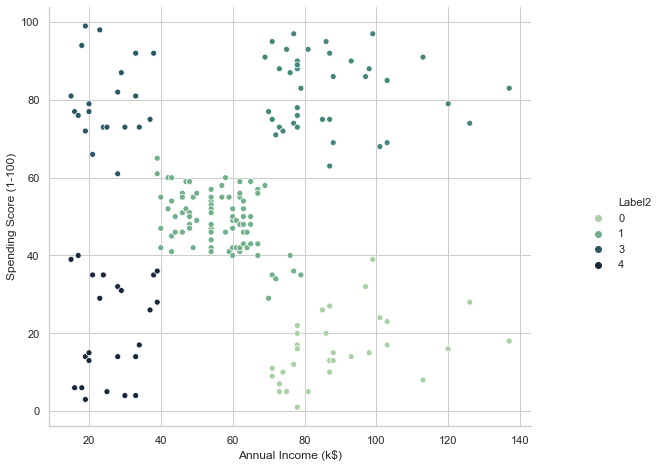

In [14]:
g = sns.relplot(x="Annual Income (k$)", y='Spending Score (1-100)', palette="ch:r=-.5,l=.75", hue="Label1", data=X);
g.fig.set_size_inches(10,7)
plt.title('Compare of clusters')
g = sns.relplot(x="Annual Income (k$)", y='Spending Score (1-100)', palette="ch:r=-.5,l=.75", hue="Label2", data=X);
g.fig.set_size_inches(10,7)

## Clusters of Customers Based on their Ages and Annual Income

In [15]:
X = df[['Annual Income (k$)','Age' ]]
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss #sum of squares of the distances of each data point 

[176108.77999999997,
 87121.56591478697,
 59486.96143928035,
 39529.88796736351,
 31968.53223665133,
 25399.022004416984,
 22434.369020258036,
 18941.948574004182,
 16369.673583314005,
 13783.078166411146]

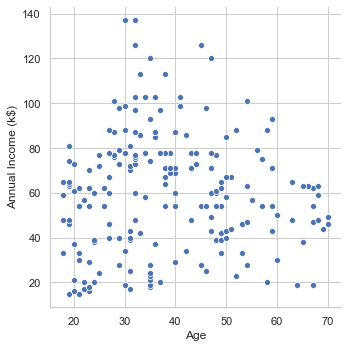

In [16]:
sns.relplot(x='Age', y='Annual Income (k$)', data=df);

Text(0, 0.5, 'WCSS')

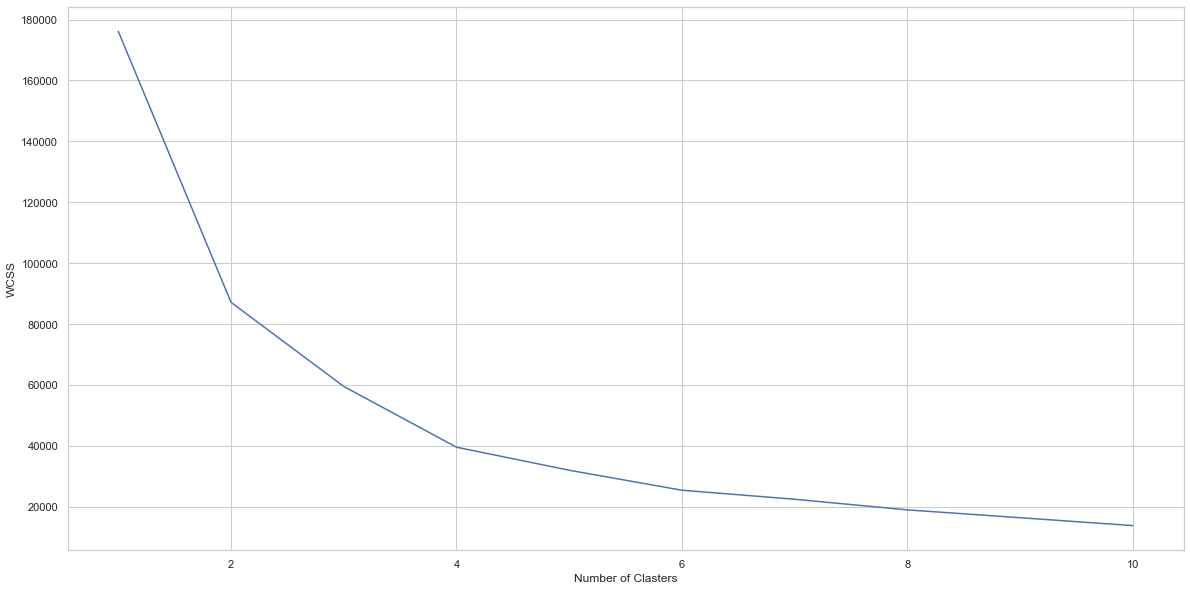

In [17]:
plt.figure(figsize=(20,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clasters')
plt.ylabel('WCSS')

In [18]:
fouremeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0) #‘k-means++’ : selects initial cluster centers for k-mean clustering
#in a smart way to speed up convergence
y_4means= fivemeansmodel.fit_predict(X)
X['Label1'] = y_4means

In [19]:
X.tail()

,Annual Income (k$),Age,Label1
195,120,35,2
196,126,45,2
197,126,32,2
198,137,32,2
199,137,30,2


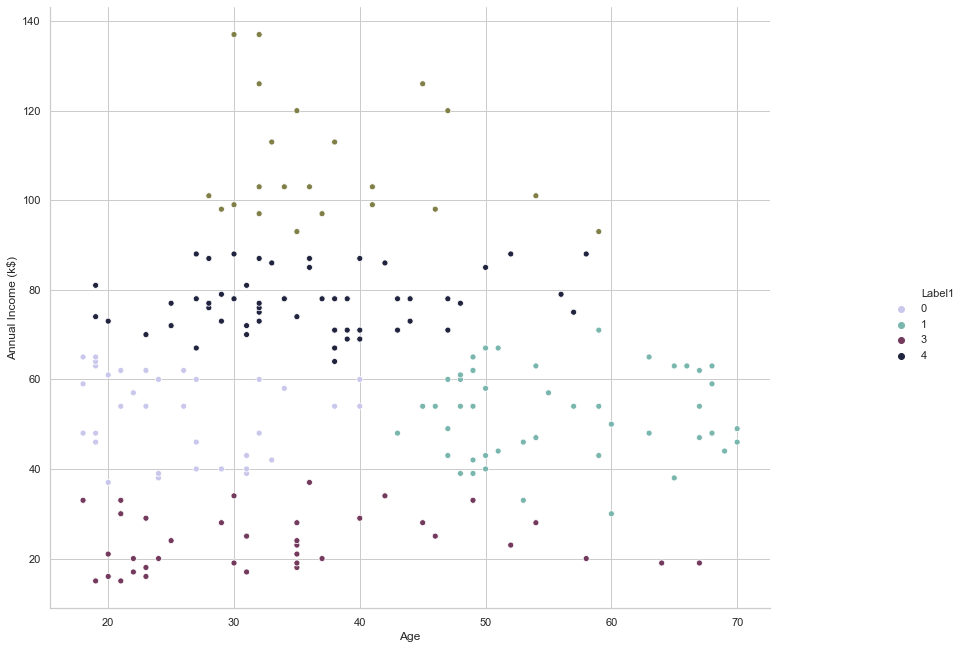

In [20]:
g = sns.relplot(x="Age", y='Annual Income (k$)', palette="ch:r=20,l=.8", hue="Label1", data=X);
g.fig.set_size_inches(15,10)

## Kmeans clustering using all variables

In [21]:
X = df[['Annual Income (k$)','Age','Spending Score (1-100)' ]]

### How our data looks like?

In [22]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
trace1 = go.Scatter3d(
    x= X['Age'],
    y= X['Spending Score (1-100)'],
    z= X['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        size= 10,
        line=dict(
            width= 12),
        opacity=0.8
     )
)
df1 = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data = df1, layout = layout)
py.iplot(fig)

### Different angle

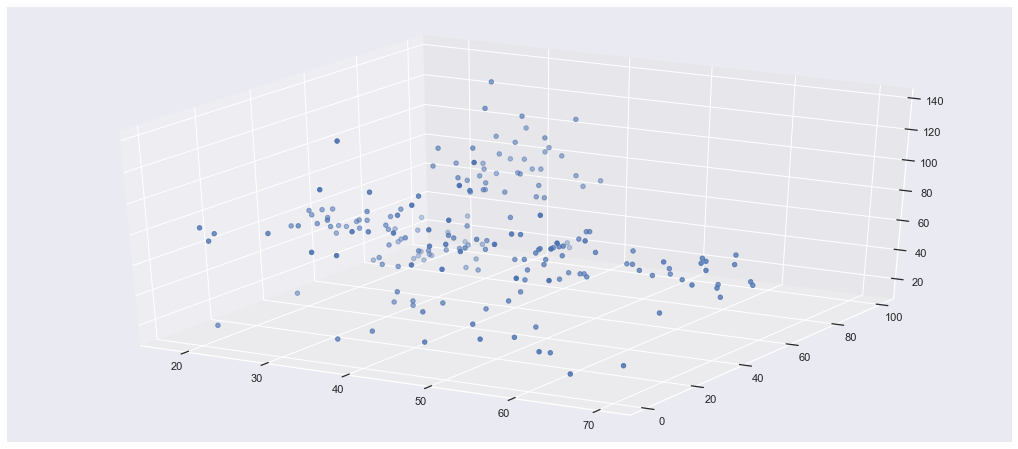

In [23]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = X['Age']
y = X['Spending Score (1-100)']
z = X['Annual Income (k$)'],

ax.scatter(x, y, z)

plt.show()

This is how our data looks like, lets try to use a KMeans model on it. 

In [24]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss #sum of squares of the distances of each data point 

[308812.78,
 212840.16982097187,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51084.50595493436,
 47593.199096880126,
 40809.75122720595,
 37602.72217380321]

Text(0, 0.5, 'WCSS')

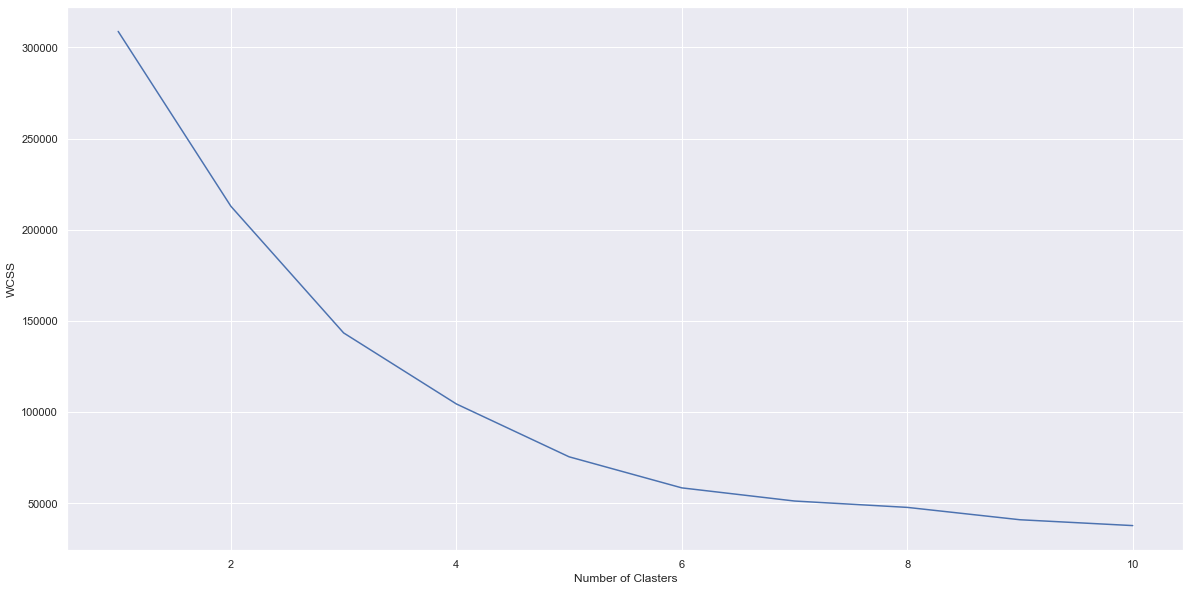

In [25]:
plt.figure(figsize=(20,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clasters')
plt.ylabel('WCSS')

 We can see that we should pick 5 clusters. 

In [26]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0) #‘k-means++’ : selects initial cluster centers for k-mean clustering
#in a smart way to speed up convergence
y_kmeans= kmeansmodel.fit_predict(X)
X['Label2'] = y_kmeans
X.tail()

,Annual Income (k$),Age,Spending Score (1-100),Label2
195,120,35,79,2
196,126,45,28,3
197,126,32,74,2
198,137,32,18,3
199,137,30,83,2


In [27]:
trace1 = go.Scatter3d(
    x=X['Age'],
    y= X['Spending Score (1-100)'],
    z= X['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = X['Label2'], 
        size= 10,
        line=dict(
            color= X['Label2'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

And this figure is our visualized outcome of the model.